In [2]:
import torch
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt



- Costruire un dataset di grafi di spin glass di piccola taglia (# basso di nodi) e studiare come l'apprendimento dell'energia da parte della GNN cambia al variare della connettività del grafo. Ad esempio fissando a 10 il numero di nodi, il numero di edges può essere cambiato da 9 (open spin glass chain) a 45 (fully connected spin glass) , magari provando 9, 15, 25, 45. Si costruiscono 4 dataset e si allena la stessa GNN separatamente su questi dataset in modo supervised per fare poi il confronto. (Livello medio)

- Costruire un dataset di grafi di spin glass a taglia e connettività fissati (# nodi non troppo alto). Studiare la comparazione tra l'apprendimento della magnetizzazione o dell'energia tra un MLP e una GNN.  Ovviamente in questo caso va ricavata la matrice di adiacenza e la matrice delle features a partire dai grafi per poter allenare l'MLP. (Livello medio)


In [3]:
# create the tensor for the edge_index


def spin_glass_graph(n_nodes, full_graph=False):
    list_1 = []
    list_2 = []
    list_x = []
    for a in range(n_nodes):

        b = (a+1)%n_nodes # connect each node to the next one, including the last one to the first one

        # forward edges
        list_1.append(a) 
        list_2.append(b)

        # backward edges    
        list_1.append(b)
        list_2.append(a)
        
        # random node features
        list_x.append(2*torch.rand(1) -1)

    if full_graph:
       

        for a in range(n_nodes):
            for b in range(n_nodes):
                if a != b:
                    list_1.append(a)
                    list_2.append(b)



    x = torch.tensor(list_x, dtype=torch.float)
    edge_index = torch.tensor([list_1, list_2], dtype=torch.long)

    data = Data(x=x, edge_index=edge_index)
    return data


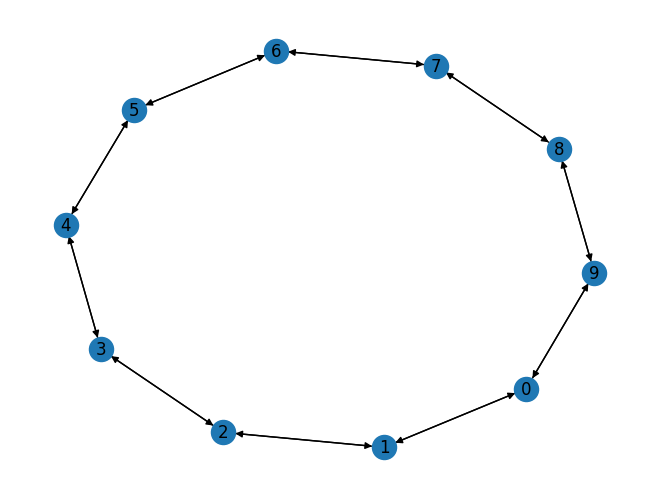

In [6]:
n_nodes = 10
full_graph = False

data = spin_glass_graph(n_nodes, full_graph)
# convert to networkx
G = to_networkx(data )

# plot using networkx
nx.draw(G,  with_labels=True)
plt.show()
